# Lien

https://training.nextflow.io/latest/fr/hello_nextflow/00_orientation/

# Partie 1

## Examiner le script et l'exécuter

In [ ]:
#!/usr/bin/env nextflow

/*
 * * Utilise echo pour imprimer 'Hello World!' dans un fichier
 */
process sayHello {

    output:
    path 'output.txt'

    script:
    """
    echo 'Hello World!' > output.txt
    """
}

workflow {

    main:
    // emmettre une salutation
    sayHello()
}


- Le premier bloc de code décrit un **processus**.

Processus = process + nom du processus + corps du {proccessus}

corps du processus = bloc de sceipt qui spécifie la commande à exécuter, qui p-ê n'importe quoi qu'on pourrait éxécuter dans un terminal. 

Ici, nous avons un processus appelé **sayHello** qui écrit sa sortie dans un fichier nommé **output.txt**

C'est une définition de processus très minimale qui contient juste une définition de **output** et le **script** à exécuter.

La définition de output inclut le qualificateur **path**, qui indique à Nextflow que cela doit être traité comme un chemin 

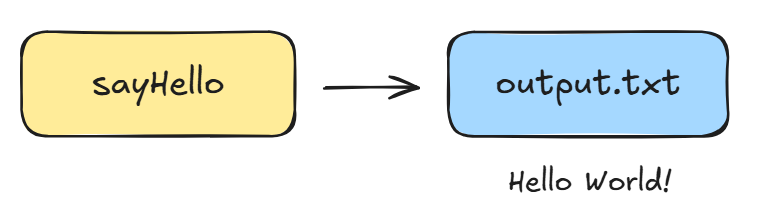



- Le deuxième bloc de code décrit le **workflow** 

Workflow = workflow + nom (opt.) + corps du {workflow}

Ici, nous avons un workflow qui consiste en un bloc main: (qui dit « ceci est le corps principal du workflow ») contenant un appel au processus sayHello.


In [ ]:
# commande pour exécuter le workflow

nextflow run hello-world.nf4

# commande de sortie 

N E X T F L O W   ~  version 25.10.2

Launching `hello-world.nf` [goofy_torvalds] DSL2 - revision: c33d41f479

executor >  local (1)
[65/7be2fa] sayHello | 1 of 1 ✔ # Cela nous indique que le processus sayHello a été exécuté avec succès une fois (1 of 1 ✔).

On retrouve donc notre fichier de sorti dans le dossier work/65/7be2fa

En plus de notre fichier output.txt, on trouvera : 

.command.begin : Métadonnées liées au début de l'exécution de l'appel de processus

.command.err : Messages d'erreur (stderr) émis par l'appel de processus

.command.log : Sortie de log complète émise par l'appel de processus

.command.out : Sortie régulière (stdout) de l'appel de processus

.command.run : Script complet exécuté par Nextflow pour exécuter l'appel de processus

.command.sh : La commande qui a été réellement exécutée par l'appel de processus

.exitcode : Le code de sortie résultant de la commande



## Publier les sorties

Le fichier de sorti est donc bien caché dans des sous dossier de sous dossier ect, cela n'est pas pratique. 

Heureusement, Nextflow fournit un moyen de publier les sorties dans un répertoire désigné en utilisant des définitions de sortie au niveau du workflow.
- Un bloc **publish**: à l'intérieur du corps du workflow, déclarant les sorties de processus.
- Un bloc **output** au script spécifiant les options de sortie telles que le mode et l'emplacement.

In [ ]:
workflow {

    main:
    // émettre une salutation
    sayHello()

    publish:
    first_output = sayHello.out
}

output {
    first_output {
        path '.'
    }
}

Nextflow a créé un nouveau répertoire appelé results/.

.
├── greetings.csv
├── hello-channels.nf
├── hello-config.nf
├── hello-containers.nf
├── hello-modules.nf
├── hello-workflow.nf
├── hello-world.nf
├── nextflow.config
├── results
│   └── output.txt -> /workspaces/training/hello-nextflow/work/9f/48ef97f110b0dbd83635d7cbe288d2/output.txt
├── solutions
│   ├── 1-hello-world
│   ├── 2-hello-channels
│   ├── 3-hello-workflow
│   ├── 4-hello-modules
│   ├── 5-hello-containers
│   └── 6-hello-config
├── test-params.json
└── work
    ├── 65
    └── 9f


Maintenant nous allons voir comment avoir un emplacement de sorti personaliser. Pour cela, il faut simplement modfifier le Path


In [ ]:
output {
    first_output {
        path 'hello_world'
    }
}

# sorti 

results/
├── hello_world
│   └── output.txt -> /workspaces/training/hello-nextflow/work/8c/79499c2e506b79e2e01acb808d9d12/output.txt
└── output.txt -> /workspaces/training/hello-nextflow/work/65/f56f2cd75df1352e106fcdd084b97b/output.txt

Par défaut, les sorties sont publiées comme des liens symboliques depuis le répertoire work. Cela signifie qu'il n'y a qu'un seul fichier sur le système de fichiers.

C'est très bien lorsque vous travaillez avec de très gros fichiers, pour lesquels vous ne voulez pas stocker plusieurs copies. Cependant, si vous supprimez le répertoire work à un moment donné (nous couvrirons les opérations de nettoyage sous peu), vous perdrez l'accès au fichier. Vous devez donc avoir un plan pour sauvegarder des copies de tous les fichiers importants dans un endroit sûr.

Une option facile est de basculer le mode de publication sur **copy** pour les sorties qui vous importent.

In [ ]:
output {
    first_output {
        path 'hello_world'
        mode 'copy'
    }
}

!!! ATTENTION !! 

L'exemple ci-dessus peu ne pas marcher. 

Jusqu'à très récemment, la façon établie de publier les sorties était de le faire au niveau de chaque processus individuel en utilisant une directive publishDir.

Pour obtenir ce que nous venons de faire pour les sorties du processus sayHello, nous aurions plutôt ajouté la ligne suivante à la définition du processus :



In [ ]:
process sayHello {

    publishDir 'results/hello_world', mode: 'copy'

    output:
    path 'output.txt'

    script:
    """
    echo 'Hello World!' > output.txt
    """
}

 ## Utiliser une entrée variable passée en ligne de commande